# Keras and TensorFlow

Keras is a very light wrapper around TensorFlow allowing us to build quite complex Neural Networks models, particularly deep learning models, very simply

https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html

# General Introduction

TensorFlow is about building graphs of transforms and mathematical operations (flows) across multidimensional arrays (tensors). These transforms begin with definitions of data and end with definitions of output. There are a lot of operations and minimizers already coded to facilitate machine learning, but it is quite a lot of code to program a deep neural network with modern features. E.G. see excercise 4, where the number of lines of code needed to make a NN with the most basic single layer was already 30 lines of python. Keras can create even a very complex tensorflow graph for MLP with only a few lines, including monitoring. In Keras you stop dealing with the tensors, and start dealing with the layers directly.

Video for this notebook


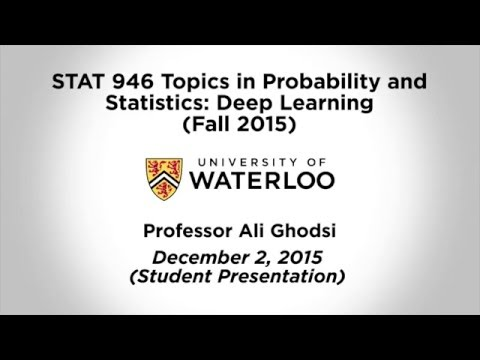

In [1]:
from IPython.display import YouTubeVideo
print "Video for this notebook"
YouTubeVideo('Tp3SaRbql4k')

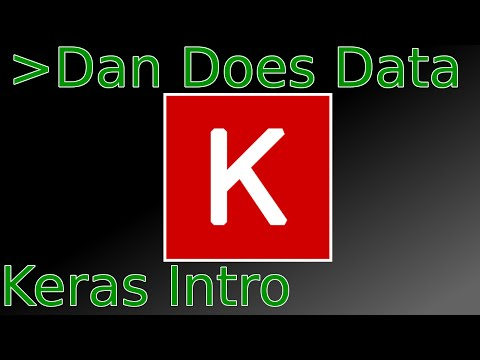

In [2]:
YouTubeVideo('L0IVu_sKOOY')

In [3]:
import keras
import pandas as pd
import sys
import tqdm
if 'seaborn' not in sys.modules:
    %pylab inline
    import seaborn

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [4]:
help(keras)

Help on package keras:

NAME
    keras

FILE
    /opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/__init__.py

PACKAGE CONTENTS
    activations
    applications (package)
    backend (package)
    callbacks
    constraints
    datasets (package)
    engine (package)
    initializations
    layers (package)
    legacy (package)
    metrics
    models
    objectives
    optimizers
    preprocessing (package)
    regularizers
    utils (package)
    wrappers (package)

DATA
    __version__ = '1.1.1'
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...

VERSION
    1.1.1




# Load MNIST data
https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

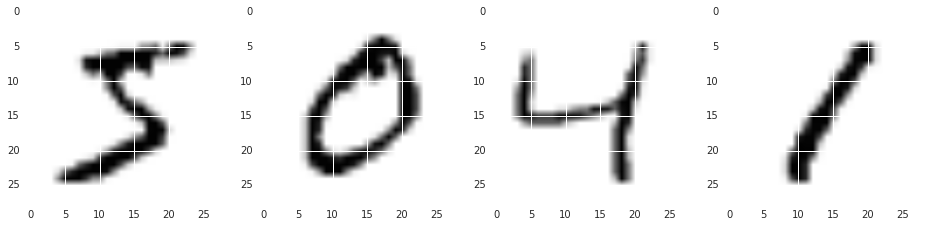

In [6]:
f = plt.figure(figsize=(16,4))
for i in range(4):
    ax = f.add_subplot(1,4,i+1)
    ax.imshow(x_train[i])

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
def raster(id_square):
    """Assume it's a square, fill a 2d grid for imshow
    """
    ret = []
    rl = int(sqrt(len(id_square)))
    for i in range(rl):
        ret.append(list(id_square[i*rl:(i+1)*rl]))
    return ret

# Training a complex Neural Network
https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

In [52]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2, activity_l2

# Dropout

In [10]:
# flatten the 2D matrices to vectors

In [11]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [12]:
# Convert the labels to One Hot Encoding

In [13]:
print(y_train.shape, y_train[0:10])
nb_classes = 10

((60000,), array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8))


In [14]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [15]:
print(Y_train.shape, Y_train[0:10])

((60000, 10), array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))


In [179]:
def build():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))#, W_regularizer=l2(0.0001), activity_regularizer=activity_l2(0.0001)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))#, W_regularizer=l2(0.0001), activity_regularizer=activity_l2(0.0001)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

model = build()

In [180]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_61 (Dense)                 (None, 512)           401920      dense_input_23[0][0]             
____________________________________________________________________________________________________
activation_59 (Activation)       (None, 512)           0           dense_61[0][0]                   
____________________________________________________________________________________________________
dropout_40 (Dropout)             (None, 512)           0           activation_59[0][0]              
____________________________________________________________________________________________________
dense_62 (Dense)                 (None, 256)           131328      dropout_40[0][0]                 
___________________________________________________________________________________________

In [155]:
def fit(model, batch_size = 256, nb_epoch = 10, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, callbacks=[]):
    history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test),
                    callbacks=callbacks)
    train = model.evaluate(X_train, Y_train, verbose=0)
    test = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', test[0])
    print('Test accuracy:', test[1])
    return history, train, test

In [181]:
experiments = []
for i in range(6):
    experiments.append(fit(build(), X_train=X_train[0:(i+1)*10000], Y_train=Y_train[0:(i+1)*10000]))
print experiments

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s - loss: 0.8459 - acc: 0.7286 - val_loss: 0.3490 - val_acc: 0.8965
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3915 - acc: 0.8838 - val_loss: 0.2566 - val_acc: 0.9233
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.3017 - acc: 0.9090 - val_loss: 0.2464 - val_acc: 0.9225
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.2408 - acc: 0.9274 - val_loss: 0.2016 - val_acc: 0.9372
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.2027 - acc: 0.9377 - val_loss: 0.1865 - val_acc: 0.9418
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.1723 - acc: 0.9485 - val_loss: 0.2071 - val_acc: 0.9380
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.1594 - acc: 0.9522 - val_loss: 0.1707 - val_acc: 0.9466
Epoch 8/10
10000/10000 [==============================] - 0s 

In [170]:
df = pd.DataFrame()

In [171]:
df['train']=[0] + [e[1][1] for e in experiments]
df['test']=[0] + [e[2][1] for e in experiments]

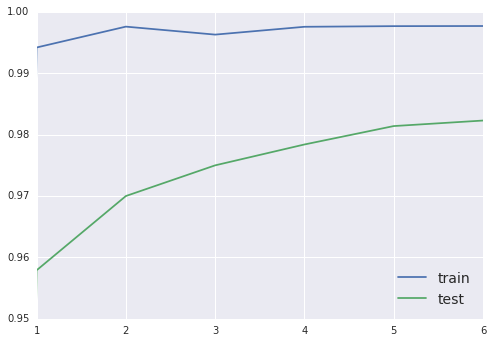

In [178]:
df['train'].plot(label='train')
df['test'].plot(label='test')
plt.ylim(.95,1.0)
plt.xlim(1,6)
plt.legend(loc='best', fontsize=14)

Note how this model is already overtrained and ideally needs *simplification* or simply improvement for higher performance.

In [103]:
history.params.viewvalues()

dict_values([1, 10, 256, ['loss', 'acc', 'val_loss', 'val_acc'], 60000, True])

# Saving and loading models
https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [32]:
# Example 1: save the model and weights together
model.save('test_keras_model.h5')  # creates a HDF5 file 'test_keras_model.h5'


In [35]:
! ls -lh *.h5

-rw-rw-r-- 1 ktbuser ktbuser 4.2M Nov 17 15:15 test_keras_model.h5


In [36]:
from keras.models import load_model

In [37]:
lmodel = load_model('test_keras_model.h5')

In [38]:
lmodel.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 512)           401920      dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 512)           0           dense_8[0][0]                    
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 512)           0           activation_7[0][0]               
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 256)           131328      dropout_5[0][0]                  
___________________________________________________________________________________________

In [47]:
# Example 2: view model and training separately

# save as JSON
json_string = model.to_json()
# save as YAML
yaml_string = model.to_yaml()
# save weights only
model.save_weights('my_model_weights.h5')

In [48]:
print (json_string)
print (yaml_string)
!ls -lh *.h5

{"class_name": "Sequential", "keras_version": "1.1.1", "config": [{"class_name": "Dense", "config": {"W_constraint": null, "b_constraint": null, "name": "dense_8", "output_dim": 512, "activity_regularizer": null, "trainable": true, "init": "glorot_uniform", "bias": true, "input_dtype": "float32", "input_dim": null, "b_regularizer": null, "W_regularizer": null, "activation": "linear", "batch_input_shape": [null, 784]}}, {"class_name": "Activation", "config": {"activation": "relu", "trainable": true, "name": "activation_7"}}, {"class_name": "Dropout", "config": {"p": 0.2, "trainable": true, "name": "dropout_5"}}, {"class_name": "Dense", "config": {"W_constraint": null, "b_constraint": null, "name": "dense_9", "activity_regularizer": null, "trainable": true, "init": "glorot_uniform", "bias": true, "input_dim": null, "b_regularizer": null, "W_regularizer": null, "activation": "linear", "output_dim": 256}}, {"class_name": "Activation", "config": {"activation": "relu", "trainable": true, "na

In [49]:
from keras.models import model_from_json
jmodel = model_from_json(json_string)

In [51]:
jmodel.load_weights('my_model_weights.h5')
jmodel.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 512)           401920      dense_input_5[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 512)           0           dense_8[0][0]                    
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 512)           0           activation_7[0][0]               
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 256)           131328      dropout_5[0][0]                  
___________________________________________________________________________________________

# Monitoring progress with callbacks

# show in TensorBoard

https://keras.io/callbacks/#tensorboard

In [141]:
callbacktb = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

In [147]:
! rm -rf './logs'

In [148]:
history = fit(model, callbacks = [callbacktb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1198 - acc: 0.9637

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_input_14' with dtype float
	 [[Node: dense_input_14 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'dense_input_14', defined at:
  File "/opt/anaconda/4.1.1/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/anaconda/4.1.1/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-6dcb8cbe318c>", line 2, in <module>
    model.add(Dense(512, input_shape=(784,)))#, W_regularizer=l2(0.0001), activity_regularizer=activity_l2(0.0001)))
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/models.py", line 280, in add
    layer.create_input_layer(batch_input_shape, input_dtype)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/engine/topology.py", line 366, in create_input_layer
    dtype=input_dtype, name=name)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/engine/topology.py", line 1091, in Input
    input_tensor=tensor)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/engine/topology.py", line 1010, in __init__
    name=self.name)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 193, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/anaconda/4.1.1/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_input_14' with dtype float
	 [[Node: dense_input_14 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


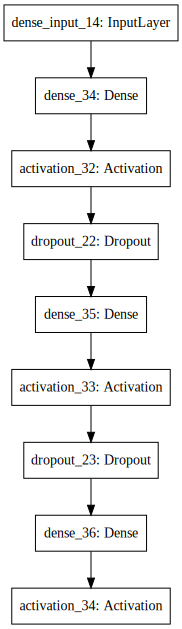

In [132]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [142]:
import subprocess as subp
import time
import os
from IPython.display import HTML

In [143]:
logdir = './logs'
!mkdir -p $logdir
port = 8082
tb = subp.Popen(["tensorboard", "--logdir=" + logdir,"--host=0.0.0.0", "--port=" + str(port)])
time.sleep(15)
!ls $logdir

events.out.tfevents.1479398230.5607d48f0764
events.out.tfevents.1479398380.5607d48f0764
events.out.tfevents.1479401155.5607d48f0764


In [144]:
# Load TensorBoard also in this notebook:
HTML('<iframe src=http://localhost:8082 width=1024 height=900></iframe>')

In [145]:
# Kill if necessary
tb.kill()